In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression (univariate)

## Generate Regression Data

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=500, n_features=1, noise=25, random_state=42)

## Data Visualization

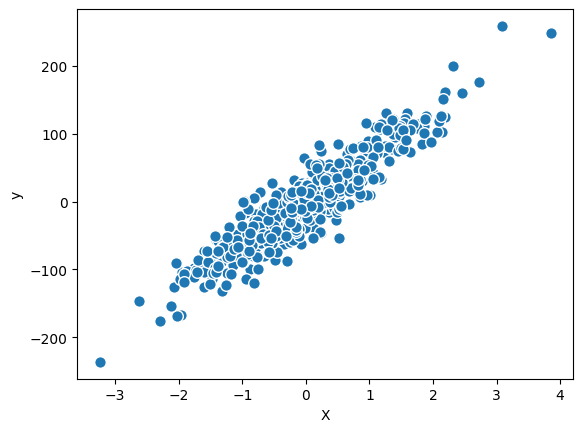

In [4]:
plt.scatter(X, y, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Base

In [1]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    def fit(self, X, y):
        pass

## Gradient Descent

In [6]:
class GradientDescent(LinearRegression):
    def __init__(self, eta=0.001, max_iter=20, random_state=42):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.cost_trend = []

    def fit(self, X, y):
        # Initialize weight values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])

        self.cost_trend = []
        for iter_i in range(self.max_iter):  # For each iteration,
            y_pred = self.predict(X)  # Predict output of X
            diff = y - y_pred  # Compute the differences

            self.w[0] += self.eta * np.sum(diff)  # Update intercept
            self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff
            J = 1/2 * np.sum(diff ** 2)  # Compute cost value
            self.cost_trend.append(J)  # Store cost value at ith-iteration

In [7]:
reg_GD = GradientDescent(eta=0.001, max_iter=20, random_state=42)
reg_GD.fit(X, y)

#### Plot the cost

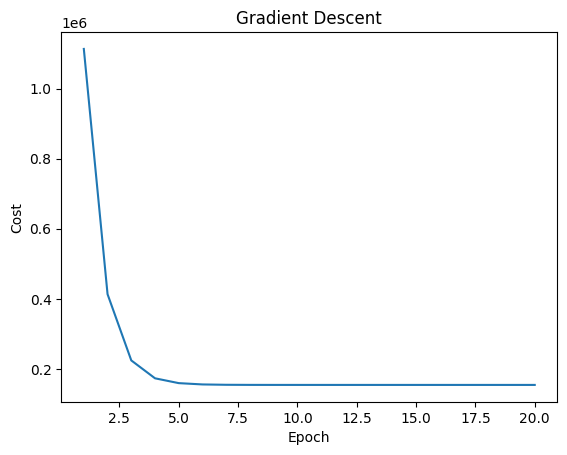

In [8]:
plt.plot(range(1, len(reg_GD.cost_trend) + 1), reg_GD.cost_trend)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

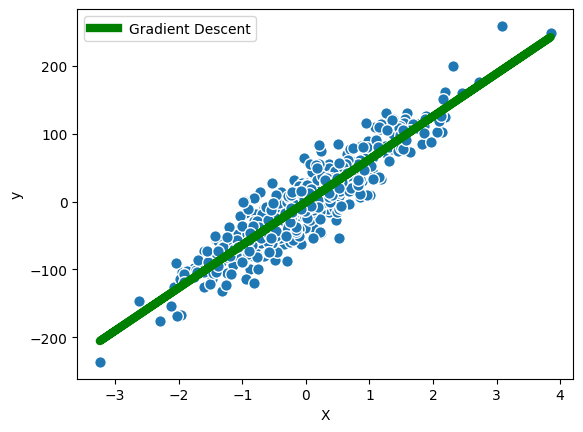

In [9]:
plt.scatter(X, y, c='tab:blue', edgecolor='white', s=70)
plt.plot(X, reg_GD.predict(X), color='green', lw=6, label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### Weight Values

In [10]:
w_GD = reg_GD.w
w_GD

array([-0.9794002 , 63.18592509])

## Linear Regression (Stochastic Gradient Descent)

In [11]:
class StochasticGradientDescent(GradientDescent):
    def __init__(self, eta=0.001, max_iter=20, random_state=42):
        super().__init__(eta, max_iter, random_state)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.cost_trend = []
        for iter_i in range(self.max_iter):
            J = 0.0
            for i, x in enumerate(X):  # Update weights for each sample instead of all samples
                y_pred = self.predict(np.array([x]))
                diff = y[i] - y_pred
                self.w[0] += self.eta * diff
                self.w[1:] += self.eta * x * diff
                J += 1/2 * diff ** 2
            self.cost_trend.append(J)

In [12]:
reg_SGD = StochasticGradientDescent(eta=0.001, max_iter=20, random_state=42)
reg_SGD.fit(X, y)

/var/folders/xn/2vlbtv4x23d9wm2srsk2lz6m0000gn/T/ipykernel_85701/1789688895.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0] += self.eta * diff


#### Plot the cost

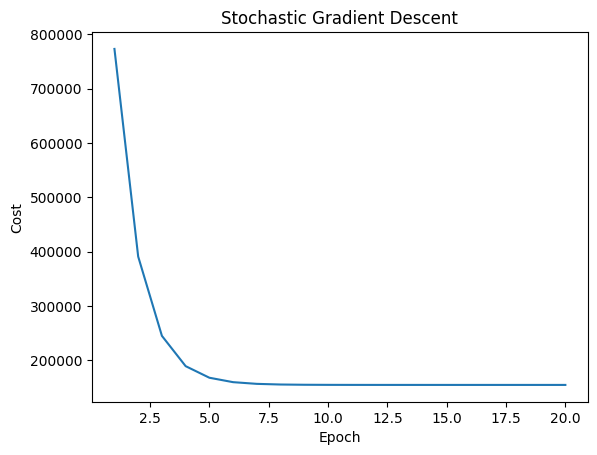

In [13]:
plt.plot(range(1, len(reg_SGD.cost_trend) + 1), reg_SGD.cost_trend)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

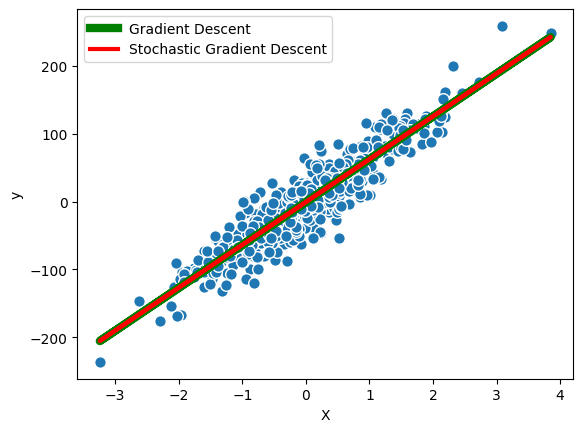

In [14]:
plt.scatter(X, y, c='tab:blue', edgecolor='white', s=70)
plt.plot(X, reg_GD.predict(X), color='green', lw=6, label='Gradient Descent')
plt.plot(X, reg_SGD.predict(X), color='red', lw=3, label='Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Weight values

In [15]:
w_SGD = reg_SGD.w
w_SGD

array([-0.78120772, 63.17580556])

## Normal Equation

In [16]:
class NormalEquation(LinearRegression):
    def fit(self, X, y):
      self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [17]:
ones_col = np.ones((len(X), 1))
X_new = np.concatenate((ones_col, X), axis=1)

In [18]:
reg_NE = NormalEquation()
reg_NE.fit(X_new, y)

In [19]:
w_NE = reg_NE.w
w_NE

array([-0.97941333, 63.18605572])

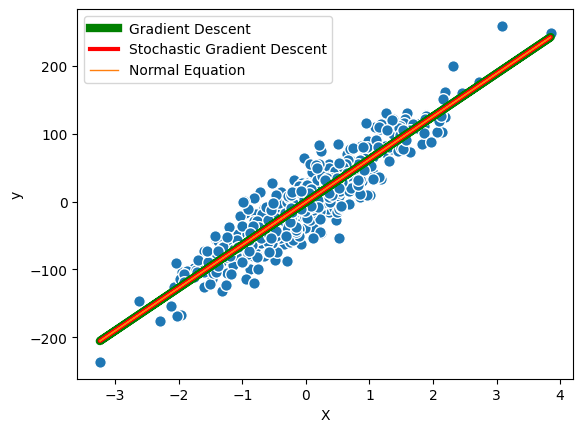

In [20]:
plt.scatter(X, y, c='tab:blue', edgecolor='white', s=70)
plt.plot(X, reg_GD.predict(X), color='green', lw=6, label='Gradient Descent')
plt.plot(X, reg_SGD.predict(X), color='red', lw=3, label='Stochastic Gradient Descent')
plt.plot(X, reg_NE.predict(X), color='tab:orange', lw=1, label='Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg_NE_sk = LinearRegression()
reg_NE_sk.fit(X, y)

LinearRegression()

In [23]:
w_NE_sk = np.append(reg_NE_sk.intercept_, reg_NE_sk.coef_)
w_NE_sk

array([-0.97941333, 63.18605572])

## Performance Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [25]:
y_pred_GD = reg_GD.predict(X)

In [26]:
y_pred_SGD = reg_SGD.predict(X)

In [27]:
y_pred_NE = reg_NE.predict(X)

In [28]:
print('MAE of GD:', round(MAE(y, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y, y_pred_NE), 6))

MAE of GD: 19.705208
MAE of SGD: 19.701649
MAE of NE: 19.70521


In [29]:
print('MSE of GD:', round(MSE(y, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y, y_pred_NE), 6))

MSE of GD: 616.709869
MSE of SGD: 616.749228
MSE of NE: 616.709869


In [30]:
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.861513
R2 of SGD: 0.861505
R2 of NE: 0.861513


## Set learning rate too large

In [31]:
reg_GD_2 = GradientDescent(eta=0.005, max_iter=20, random_state=42)
reg_GD_2.fit(X, y)

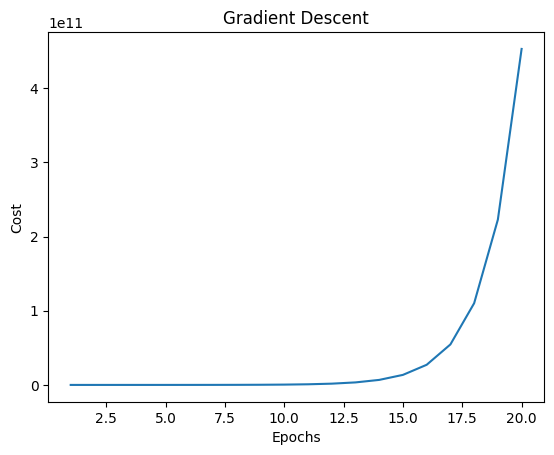

In [32]:
plt.plot(range(1, len(reg_GD_2.cost_trend) + 1), reg_GD_2.cost_trend)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# Polynominal Regression


In [33]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

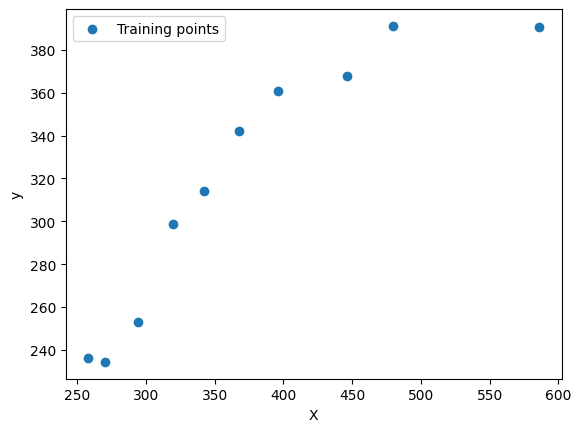

In [34]:
plt.scatter(X, y, label='Training points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Experiment with Linear Regression

In [35]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

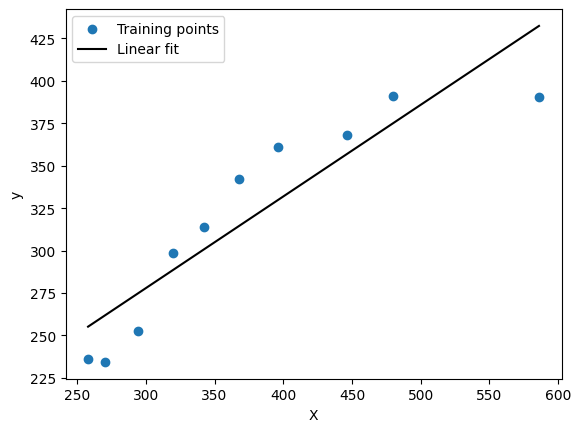

In [36]:
plt.scatter(X, y, label='Training points')
plt.plot(X, lr.predict(X), color='black', label='Linear fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Experiment with Polynominal Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
pr.fit(X_quad, y)

LinearRegression()

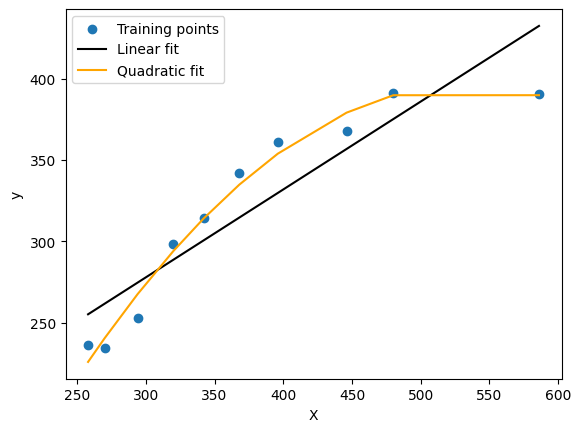

In [39]:
plt.scatter(X, y, label='Training points')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, lr.predict(X), label='Linear fit', c='black')
plt.plot(X, pr.predict(X_quad), c='orange', label='Quadratic fit')
plt.legend()
plt.show()

In [40]:
X_test = np.arange(250, 600, 10)[:, np.newaxis]

In [41]:
y_pred_linear = lr.predict(X_test)
y_pred_quad = pr.predict(quadratic.fit_transform(X_test))

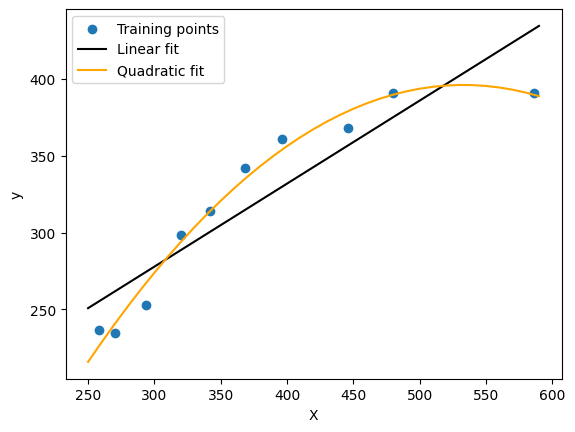

In [42]:
plt.scatter(X, y, label='Training points')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_test, y_pred_linear, label='Linear fit', c='black')
plt.plot(X_test, y_pred_quad, label='Quadratic fit', c='orange')
plt.legend()
plt.show()